C:\Users\elsab\AppData\Local\Temp\ipykernel_10672\1611103973.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.data[col].fillna(self.data[col].median(), inplace=True)
C:\Users\elsab\AppData\Local\Temp\ipykernel_10672\1611103973.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

MAE: 110659.08628680879
MSE: 56887397693.01191
R²: 0.6571300033900527


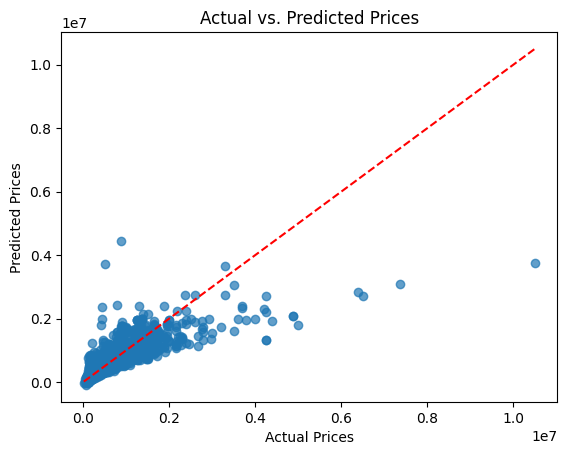

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


class LinearRegressionModel:
    def __init__(self, data: pd.DataFrame):
        """
        Initializes the LinearRegressionModel class with a dataset.
        Cleans the data and performs feature engineering upon initialization.
        """
        self.data = data
        self.model = LinearRegression()
        self.cleaner()
        self.feature_engineering()

    def cleaner(self):
        """Cleans the dataset by handling missing values and removing outliers."""
        # Fill missing numeric values with the median and non-numeric with the mode
        for col in self.data.select_dtypes(include=["float64", "int64"]).columns:
            self.data[col].fillna(self.data[col].median(), inplace=True)

        for col in self.data.select_dtypes(include=["object"]).columns:
            self.data[col].fillna(self.data[col].mode()[0], inplace=True)

        # Drop irrelevant or non-predictive columns
        columns_to_drop = ["Unnamed: 0", "municipality_code", "locality", "postal_code"]
        self.data.drop(columns=columns_to_drop, errors="ignore", inplace=True)

    def feature_engineering(self):
        """Transforms the data and creates new features for modeling."""
        # Calculate price per square meter as a new feature 
        self.data["price_per_m2"] = self.data["price"] / (self.data["livingarea"])
        

    def split_data(self):
        """Splits the data into training and test sets."""
        numeric_features = [
            "bedrooms",
            "livingarea",
            "surfaceoftheplot",
            "gardensurface",
            "facades",
            "pool",
            "price_per_m2",
            "is_apartment",
            "is_house",
        ]
        X = self.data[numeric_features]
        y = self.data["price"]

        return train_test_split(X, y, test_size=0.3, random_state=42)

    def train_model(self, X_train, y_train):
        """Trains the Linear Regression model."""
        self.model.fit(X_train, y_train)

    def evaluate_model(self, X_test, y_test):
        """Evaluates the model on test data."""
        y_pred = self.model.predict(X_test)

        print("MAE:", mean_absolute_error(y_test, y_pred))
        print("MSE:", mean_squared_error(y_test, y_pred))
        print("R²:", r2_score(y_test, y_pred))

        return y_test, y_pred

    def visualize_results(self, y_test, y_pred):
        """Visualizes actual vs. predicted prices."""
        plt.scatter(y_test, y_pred, alpha=0.7)
        plt.plot(
            [min(y_test), max(y_test)],
            [min(y_test), max(y_test)],
            color="red",
            linestyle="--",
        )
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title("Actual vs. Predicted Prices")
        plt.show()


# Load the dataset with explicit data types to fix mixed-type issues
data = pd.read_csv("all_province_municipality.csv", low_memory=False)

# Initialize the model
model = LinearRegressionModel(data)

# Split the data
X_train, X_test, y_train, y_test = model.split_data()

# Train the model
model.train_model(X_train, y_train)

# Evaluate the model
y_test_actual, y_pred_actual = model.evaluate_model(X_test, y_test)

# Visualize the results
model.visualize_results(y_test_actual,y_pred_actual)

# notes

### Accuracy computing procedure (on a test set? What split %, 80/20, 90/10, 50/50? k-fold cross?)

Training set: Used to train the model.

Test set: Used to evaluate the model’s performance after training
